In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def initMap(width, height, pointDist, pointEntre):
    
    Bwidth = np.random.randint(40,70,width)
    Bheight = np.random.randint(40,80,height)
    
    Map = []        
    distribudor = []
    entrega = []
    
    graphTotal = []
    
    dic = {}
    
    di = pointDist
    en = pointEntre
    reduce = di + en
    
    if reduce >= width*height:
        return Map, distribudor, entrega   
    
    for i in range(width):
        tem = []            
        for j in range(height):
            n = random.randint(0,30)
            #aca deberia de ser el mapa pero el grafo apuntando respectivamente a su pos
            #plt.scatter(sum(Bwidth[:i]), sum(Bheight[:j]), s=1, color='green')
            tem.append([sum(Bwidth[:i]),sum(Bwidth[:j]), 0])
            graphTotal.append([sum(Bwidth[:i]),sum(Bwidth[:j]), 0])
        Map.append(tem[:])
    
    while reduce != 0:
        
        xx = random.randint(0,width-1)
        yy = random.randint(0,height-1)
        new = (str(xx)+str(yy))      
                
        if new not in dic:
            dic[new] = 1
            if en == 0 and di == 0:
                reduce = reduce -1
            elif en == 0:
                #Pertenece solamente a un distribudor
                Map[xx][yy][2] = 1
                distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 1,  color='blue')
                di = di - 1
                reduce = reduce -1
            elif di == 0:
                #Pertenece solamente a los almacenes
                Map[xx][yy][2] = 2
                entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 1,  color='red')
                en = en - 1
                reduce = reduce -1
            else:
                ops = random.randint(0,1)
                if ops == 0:
                    #Pertenece solamente a un distribudor
                    Map[xx][yy][2] = 1
                    distribudor.append([Map[xx][yy][0],Map[xx][yy][1]])
                    #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 1,  color='blue')
                    di = di - 1
                    reduce = reduce -1
                elif ops == 1:
                    #Pertenece solamente a los almacenes
                    Map[xx][yy][2] = 2
                    entrega.append([Map[xx][yy][0],Map[xx][yy][1]])
                    #plt.scatter(sum(Bwidth[:xx]), sum(Bheight[:yy]), s = 1,  color='red')
                    en = en - 1
                    reduce = reduce -1
    
    print(Map)
    return Map, distribudor, entrega

[[[0, 0, 0], [0, 60, 0], [0, 126, 0], [0, 193, 0], [0, 233, 0], [0, 287, 0], [0, 328, 0], [0, 376, 0], [0, 416, 0], [0, 478, 0], [0, 541, 0], [0, 592, 0], [0, 642, 0], [0, 703, 0], [0, 770, 0], [0, 824, 0], [0, 880, 0], [0, 932, 0], [0, 990, 0], [0, 1049, 0], [0, 1096, 0], [0, 1148, 0], [0, 1190, 0], [0, 1242, 0], [0, 1297, 0], [0, 1343, 0], [0, 1408, 0], [0, 1459, 0], [0, 1511, 0], [0, 1566, 0], [0, 1610, 1], [0, 1659, 0], [0, 1702, 0], [0, 1767, 0], [0, 1817, 0], [0, 1877, 0], [0, 1926, 0], [0, 1989, 0], [0, 2057, 0], [0, 2117, 0]], [[60, 0, 0], [60, 60, 0], [60, 126, 0], [60, 193, 0], [60, 233, 0], [60, 287, 0], [60, 328, 0], [60, 376, 0], [60, 416, 0], [60, 478, 0], [60, 541, 0], [60, 592, 0], [60, 642, 0], [60, 703, 0], [60, 770, 0], [60, 824, 0], [60, 880, 0], [60, 932, 0], [60, 990, 0], [60, 1049, 0], [60, 1096, 0], [60, 1148, 0], [60, 1190, 0], [60, 1242, 0], [60, 1297, 0], [60, 1343, 0], [60, 1408, 0], [60, 1459, 0], [60, 1511, 0], [60, 1566, 0], [60, 1610, 0], [60, 1659, 0], 

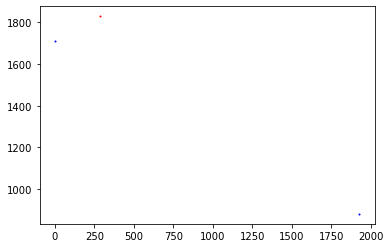

In [3]:
#matrix, geneDistr, geneEntre = initMap(400,400, 100, 2500)
matrix, geneDistr, geneEntre = initMap(100, 100, 100, 1600)

In [4]:
def convertEdge(M):
    
    graph = []
    
    w = len(M)
    h = len(M[0])
    node = 0
    for i in range(w):
        for j in range(h):
            y, x, t = M[i][j]
            graph.append([node,x, y, t])
            node += 1
    
    return np.array(graph)

In [5]:
def mat(G):
    
    stack = []
    
    for i in range(len(G)):        
        for j in range(len(G[0])):
            tem = []
            if j+1 != len(G[0]) and i % 2 == 0:
                tem.append([(len(G[0])*(i))+j+1, G[i][j+1][1] , G[i][j+1][0], G[i][j+1][2]])
            elif j != 0 and i % 2 != 0:
                tem.append([(len(G[0])*(i))+j-1, G[i][j-1][1] , G[i][j-1][0], G[i][j-1][2]])
                    
            if i+1 != len(G) and j % 2 != 0:
                tem.append([j+(len(G[0])*(i+1)), G[i+1][j][1] , G[i+1][j][0], G[i+1][j][2]])
            elif i != 0 and j % 2 == 0:
                tem.append([j+(len(G[0])*(i-1)), G[i-1][j][1] , G[i-1][j][0], G[i-1][j][2]])
            stack.append(tem)
    #print(np.array(stack))
    return stack

In [6]:
def orderByPos(stack, pos):
    
    def take(elem):
        return elem[pos]
    
    stack.sort(key=take)

In [7]:
def heuristic(x, y):
    
    if x < 0:
        x = x * -1
    if y < 0:
        y = y * -1
    
    h = x + y
    return h

In [15]:
def start(M, init, final):
    
    Graph = mat(M)    
    n = len(Graph)
    visited = [False]*n
    parent = [None]*n
    visited[init] = True
    
    Edges = convertEdge(M)
    fpos, fx, fy, t = Edges[final]
    print(Edges)
    
    stack = []
    stack.append([init, 0])
    count = 0
    while stack:
        
        pos, cost = stack[0]
        if pos == fpos:
            print(True)
            print(count)
            return
        
        for edge in Graph[pos]:
            node, x, y, t = edge
            
            h = heuristic((x-fx),(y-fy))
            
            if visited[node] == False:
                visited[node] = True
                parent[node] = pos
                stack.append([node, h])
        stack.pop(0) 
        orderByPos(stack,1)
        count += 1
        print(f"Order: {stack}")

In [19]:
#NG = mat(matrix)
#print(convertEdge(matrix))
#print(np.array(NG))
start(matrix, 1570, 1566)

[[   0    0    0    0]
 [   1   60    0    0]
 [   2  126    0    0]
 ...
 [1597 1989 2117    0]
 [1598 2057 2117    0]
 [1599 2117 2117    0]]
Order: [[1569, 150], [1530, 273]]
Order: [[1568, 88], [1530, 273]]
Order: [[1567, 48], [1528, 148], [1530, 273]]
Order: [[1566, 0], [1528, 148], [1530, 273]]
True
4


In [111]:
n, m = [1,5]
print(m)

5
